In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as pyplot
import seaborn as sns
%matplotlib inline 
data = pd.read_csv("Amazon Sales Records.csv",encoding = 'latin-1')

In [101]:
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,2012-08
2,Europe,Russia,Office Supplies,Offline,L,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,2013-02
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,547995746,2015-02-21,2974,255.28,159.42,759202.72,474115.08,285087.64,2,2015,2015-02
6,Sub-Saharan Africa,Angola,Household,Offline,M,135425221,2011-04-27,4187,668.27,502.54,2798046.49,2104134.98,693911.51,4,2011,2011-04
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,871543967,2012-07-27,8082,154.06,90.93,1245112.92,734896.26,510216.66,7,2012,2012-07
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,770463311,2015-08-25,6070,81.73,56.67,496101.10,343986.90,152114.20,7,2015,2015-07
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,616607081,2014-05-30,6593,205.70,117.11,1356180.10,772106.23,584073.87,4,2014,2014-04


In [28]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [30]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [31]:
data['Region'] = data['Region'].astype(str)
data['Country'] = data['Country'].astype(str)
data['Item Type'] = data['Item Type'].astype(str)
data['Sales Channel'] = data['Sales Channel'].astype(str)
data['Order Priority'] = data['Order Priority'].astype(str)

In [32]:
data[['Units Sold', 'Unit Price',	'Unit Cost', 'Total Revenue', 'Total Cost',	'Total Profit']].describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [33]:
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Date MonthYear'] = data['Order Date'].dt.strftime('%Y-%m')
data = data.drop(columns=['Order Date'])

In [34]:
df = data

In [35]:
df.isnull().sum()

Region                  0
Country                 0
Item Type               0
Sales Channel           0
Order Priority          0
Order ID                0
Ship Date               0
Units Sold              0
Unit Price              0
Unit Cost               0
Total Revenue           0
Total Cost              0
Total Profit            0
Order Month             0
Order Year              0
Order Date MonthYear    0
dtype: int64

In [36]:
pd.set_option('display.max_rows', None)
df['Country'].value_counts()

The Gambia                          4
Sierra Leone                        3
Sao Tome and Principe               3
Mexico                              3
Australia                           3
Djibouti                            3
Switzerland                         2
Myanmar                             2
Norway                              2
Turkmenistan                        2
Cameroon                            2
Bulgaria                            2
Honduras                            2
Azerbaijan                          2
Libya                               2
Rwanda                              2
Mali                                2
Gabon                               1
Belize                              1
Haiti                               1
Lithuania                           1
San Marino                          1
United Kingdom                      1
Austria                             1
Fiji                                1
Madagascar                          1
Cote d'Ivoir

Box Plot for Total Revenue 

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


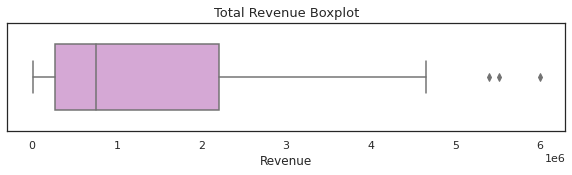

In [39]:
import matplotlib.pyplot as plt
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Total Revenue'], color="plum", width=.6)

plt.title('Total Revenue Boxplot', fontsize=13)
plt.xlabel('Revenue')
plt.show()

In [38]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 3rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [53]:
outliers = detect_outliers(df, df["Total Profit"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                               Europe
Coun

In [54]:
print(outliers)

[13, 30, 33, 46, 74, 79, 93]


In [55]:
list_length = len(outliers)

# Print the number of values in the list
print("The list has", list_length, "outliers in Total Revenue column of dataframe data ")

The list has 7 outliers in Total Revenue column of dataframe data 


In [56]:
df[df['Country'] == 'Honduras']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
13,Central America and the Caribbean,Honduras,Household,Offline,H,522840487,2017-02-13,8974,668.27,502.54,5997054.98,4509793.96,1487261.02,2,2017,2017-02
22,Central America and the Caribbean,Honduras,Snacks,Online,L,795490682,2016-07-26,2225,152.58,97.44,339490.50,216804.00,122686.50,6,2016,2016-06


In [57]:
df[df['Country'] == 'Switzerland']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
30,Europe,Switzerland,Cosmetics,Offline,M,249693334,2012-10-20,8661,437.20,263.33,3786589.20,2280701.13,1505888.07,9,2012,2012-09
47,Europe,Switzerland,Personal Care,Online,M,617667090,2011-01-31,273,81.73,56.67,22312.29,15470.91,6841.38,12,2010,2010-12


In [58]:
df[df['Country'] == 'Myanmar']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
33,Asia,Myanmar,Household,Offline,H,177713572,2015-03-01,8250,668.27,502.54,5513227.5,4145955.0,1367272.5,1,2015,2015-01
44,Asia,Myanmar,Clothes,Online,H,223359620,2015-11-18,5930,109.28,35.84,648030.4,212531.2,435499.2,11,2015,2015-11


In [59]:
df[df['Country'] == 'Iceland']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
46,Europe,Iceland,Cosmetics,Online,C,331438481,2016-12-31,8867,437.2,263.33,3876652.4,2334947.11,1541705.29,12,2016,2016-12


In [60]:
df[df['Country'] == 'Pakistan']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
74,Middle East and North Africa,Pakistan,Cosmetics,Offline,L,231145322,2013-08-16,9892,437.2,263.33,4324782.4,2604860.36,1719922.04,7,2013,2013-07


In [61]:
df[df['Country'] == 'Samoa']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear


In [62]:
df[df['Country'] == 'Romania']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
93,Europe,Romania,Cosmetics,Online,H,660643374,2010-12-25,7910,437.2,263.33,3458252.0,2082940.3,1375311.7,11,2010,2010-11


Box Plot of Total Cost 

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


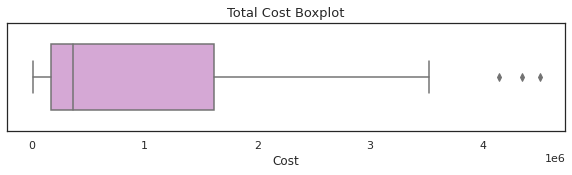

In [63]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Total Cost'], color="plum", width=.6)

plt.title('Total Cost Boxplot', fontsize=13)
plt.xlabel('Cost')
plt.show()

In [64]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 3rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [65]:
outliers = detect_outliers(df, df["Total Cost"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                                 Asia
Coun

In [66]:
print(outliers)

[13, 33, 38, 68, 75]


In [67]:
list_length = len(outliers)

# Print the number of values in the list
print("The list has", list_length, "outliers in Total Cost column of dataframe data ")

The list has 5 outliers in Total Cost column of dataframe data 


In [69]:
df[df['Country'] == 'Myanmar']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
33,Asia,Myanmar,Household,Offline,H,177713572,2015-03-01,8250,668.27,502.54,5513227.5,4145955.0,1367272.5,1,2015,2015-01
44,Asia,Myanmar,Clothes,Online,H,223359620,2015-11-18,5930,109.28,35.84,648030.4,212531.2,435499.2,11,2015,2015-11


In [68]:
df[df['Country'] == 'Honduras']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
13,Central America and the Caribbean,Honduras,Household,Offline,H,522840487,2017-02-13,8974,668.27,502.54,5997054.98,4509793.96,1487261.02,2,2017,2017-02
22,Central America and the Caribbean,Honduras,Snacks,Online,L,795490682,2016-07-26,2225,152.58,97.44,339490.50,216804.00,122686.50,6,2016,2016-06


In [70]:
df[df['Country'] == 'Brunei']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
38,Asia,Brunei,Office Supplies,Online,L,320009267,2012-05-08,6708,651.21,524.96,4368316.68,3521431.68,846885.0,4,2012,2012-04


In [71]:
df[df['Country'] == 'Lithuania']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
68,Europe,Lithuania,Office Supplies,Offline,H,166460740,2010-11-17,8287,651.21,524.96,5396577.27,4350343.52,1046233.75,10,2010,2010-10


In [72]:
df[df['Country'] == 'Mexico']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
75,North America,Mexico,Household,Offline,C,986435210,2014-12-12,6954,668.27,502.54,4647149.58,3494663.16,1152486.42,11,2014,2014-11
85,North America,Mexico,Personal Care,Offline,L,430915820,2012-03-20,6422,81.73,56.67,524870.06,363934.74,160935.32,2,2012,2012-02
98,North America,Mexico,Personal Care,Offline,M,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,7,2015,2015-07


Box Plot of Total Revenue

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


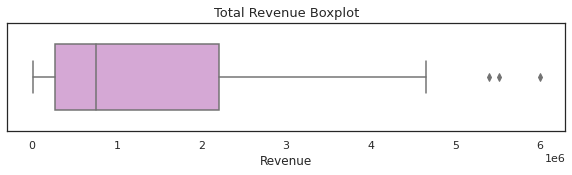

In [73]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Total Revenue'], color="plum", width=.6)

plt.title('Total Revenue Boxplot', fontsize=13)
plt.xlabel('Revenue')
plt.show()

In [74]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 3rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [75]:
outliers = detect_outliers(df, df["Total Revenue"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                                 Asia
Coun

In [76]:
print(outliers)

[13, 33, 38, 68, 74, 75]


In [77]:
list_length = len(outliers)

# Print the number of values in the list
print("The list has", list_length, "outliers in Total Revenue column of dataframe data ")

The list has 6 outliers in Total Revenue column of dataframe data 


In [78]:
df[df['Country'] == 'Honduras']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
13,Central America and the Caribbean,Honduras,Household,Offline,H,522840487,2017-02-13,8974,668.27,502.54,5997054.98,4509793.96,1487261.02,2,2017,2017-02
22,Central America and the Caribbean,Honduras,Snacks,Online,L,795490682,2016-07-26,2225,152.58,97.44,339490.50,216804.00,122686.50,6,2016,2016-06


In [79]:
df[df['Country'] == 'Myanmar']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
33,Asia,Myanmar,Household,Offline,H,177713572,2015-03-01,8250,668.27,502.54,5513227.5,4145955.0,1367272.5,1,2015,2015-01
44,Asia,Myanmar,Clothes,Online,H,223359620,2015-11-18,5930,109.28,35.84,648030.4,212531.2,435499.2,11,2015,2015-11


In [80]:
df[df['Country'] == 'Brunei']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
38,Asia,Brunei,Office Supplies,Online,L,320009267,2012-05-08,6708,651.21,524.96,4368316.68,3521431.68,846885.0,4,2012,2012-04


In [81]:
df[df['Country'] == 'Lithuania']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
68,Europe,Lithuania,Office Supplies,Offline,H,166460740,2010-11-17,8287,651.21,524.96,5396577.27,4350343.52,1046233.75,10,2010,2010-10


In [82]:
df[df['Country'] == 'Pakistan']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
74,Middle East and North Africa,Pakistan,Cosmetics,Offline,L,231145322,2013-08-16,9892,437.2,263.33,4324782.4,2604860.36,1719922.04,7,2013,2013-07


In [83]:
df[df['Country'] == 'Mexico']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
75,North America,Mexico,Household,Offline,C,986435210,2014-12-12,6954,668.27,502.54,4647149.58,3494663.16,1152486.42,11,2014,2014-11
85,North America,Mexico,Personal Care,Offline,L,430915820,2012-03-20,6422,81.73,56.67,524870.06,363934.74,160935.32,2,2012,2012-02
98,North America,Mexico,Personal Care,Offline,M,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,7,2015,2015-07


Box Plot of Unit Cost 

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


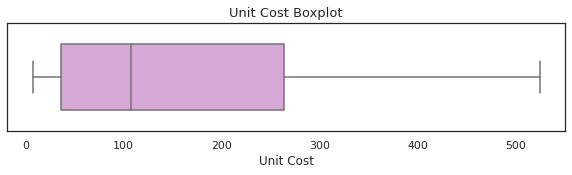

In [84]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Unit Cost'], color="plum", width=.6)

plt.title('Unit Cost Boxplot', fontsize=13)
plt.xlabel('Unit Cost')
plt.show()

Box Plot of Unit Price

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


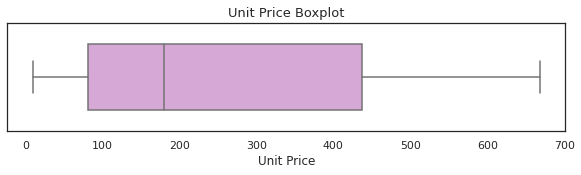

In [85]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Unit Price'], color="plum", width=.6)

plt.title('Unit Price Boxplot', fontsize=13)
plt.xlabel('Unit Price')
plt.show()

Box Plot of Unit Sold 

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


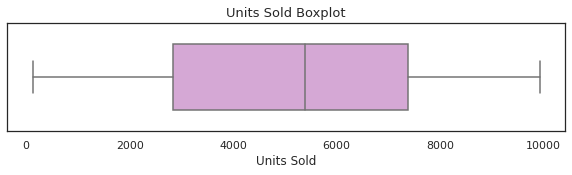

In [86]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Units Sold'], color="plum", width=.6)

plt.title('Units Sold Boxplot', fontsize=13)
plt.xlabel('Units Sold')
plt.show()

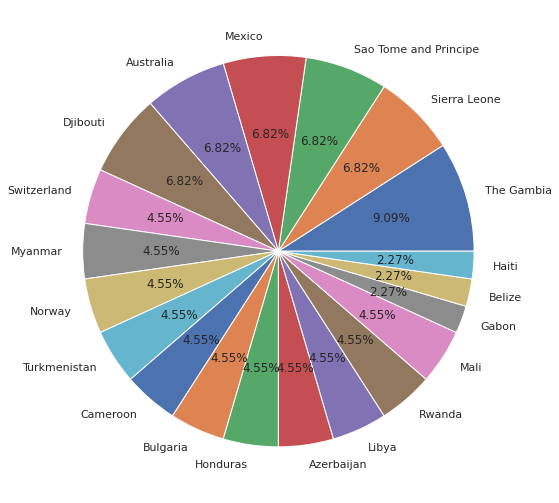

In [87]:
import matplotlib.pyplot as plt 
country_names = df.Country.value_counts().index
country_val = df.Country.value_counts().values
# Pie Chart for top 20 country
fig,ax = plt.subplots(figsize=(9,9))
ax.pie(country_val[:20],labels=country_names[:20],autopct='%1.2f%%')
plt.show()

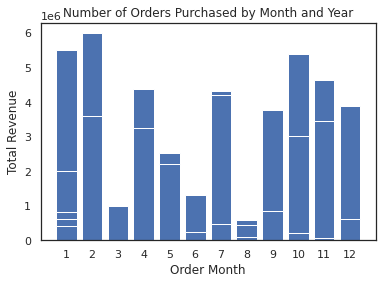

In [89]:
# Create a bar chart
plt.bar(df['Order Month'], df['Total Revenue'])

# Set the chart title and axis labels
plt.title('Number of Orders Purchased by Month and Year')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Revenue')

# Rotate the x-axis labels for better readability

# Display the chart
plt.show()

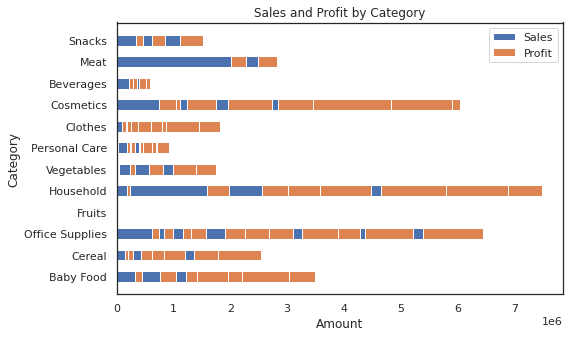

In [90]:
# Set the figure size
fig, ax = plt.subplots(figsize=(8, 5))

# Create the bar plot
ax.barh(df['Item Type'], df['Total Revenue'], height=0.5, label='Sales')
ax.barh(df['Item Type'], df['Total Profit'], height=0.5, left=df['Total Revenue'], label='Profit')

# Set the axis labels and chart title
ax.set_xlabel('Amount')
ax.set_ylabel('Category')
ax.set_title('Sales and Profit by Category')

# Add a legend
ax.legend()

# Display the chart
plt.show()

Text(0.5, 1.0, 'Profit per year')

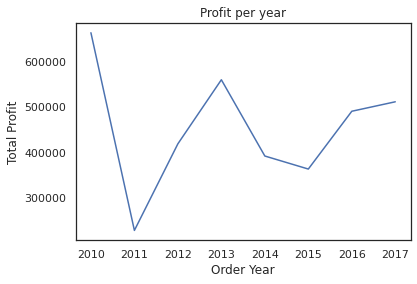

In [92]:
df.groupby('Order Year')['Total Profit'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Profit')
plt.title('Profit per year')

In [93]:
total_revenue = df['Total Revenue'].sum()
total_revenue

137348768.31

In [94]:
average_revenue = df['Total Revenue'].mean()
average_revenue

1373487.6831

In [95]:
max_revenue = df['Total Revenue'].max()
max_revenue

5997054.98

In [96]:
min_revenue = df['Total Revenue'].min()
min_revenue

4870.26

In [97]:
revenue_by_category = df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)
revenue_by_category

Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Snacks              2080733.46
Fruits               466481.34
Name: Total Revenue, dtype: float64

In [98]:
profit_by_category = df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False)
profit_by_category

Item Type
Cosmetics          14556048.66
Household           7412605.71
Office Supplies     5929583.75
Clothes             5233334.40
Baby Food           3886643.70
Cereal              2292443.43
Vegetables          1265819.63
Personal Care       1220622.48
Beverages            888047.28
Snacks               751944.18
Meat                 610610.00
Fruits               120495.18
Name: Total Profit, dtype: float64

In [99]:
print(df[['Total Revenue', 'Total Cost', 'Total Profit']].corr())

               Total Revenue  Total Cost  Total Profit
Total Revenue       1.000000    0.983928      0.897327
Total Cost          0.983928    1.000000      0.804091
Total Profit        0.897327    0.804091      1.000000


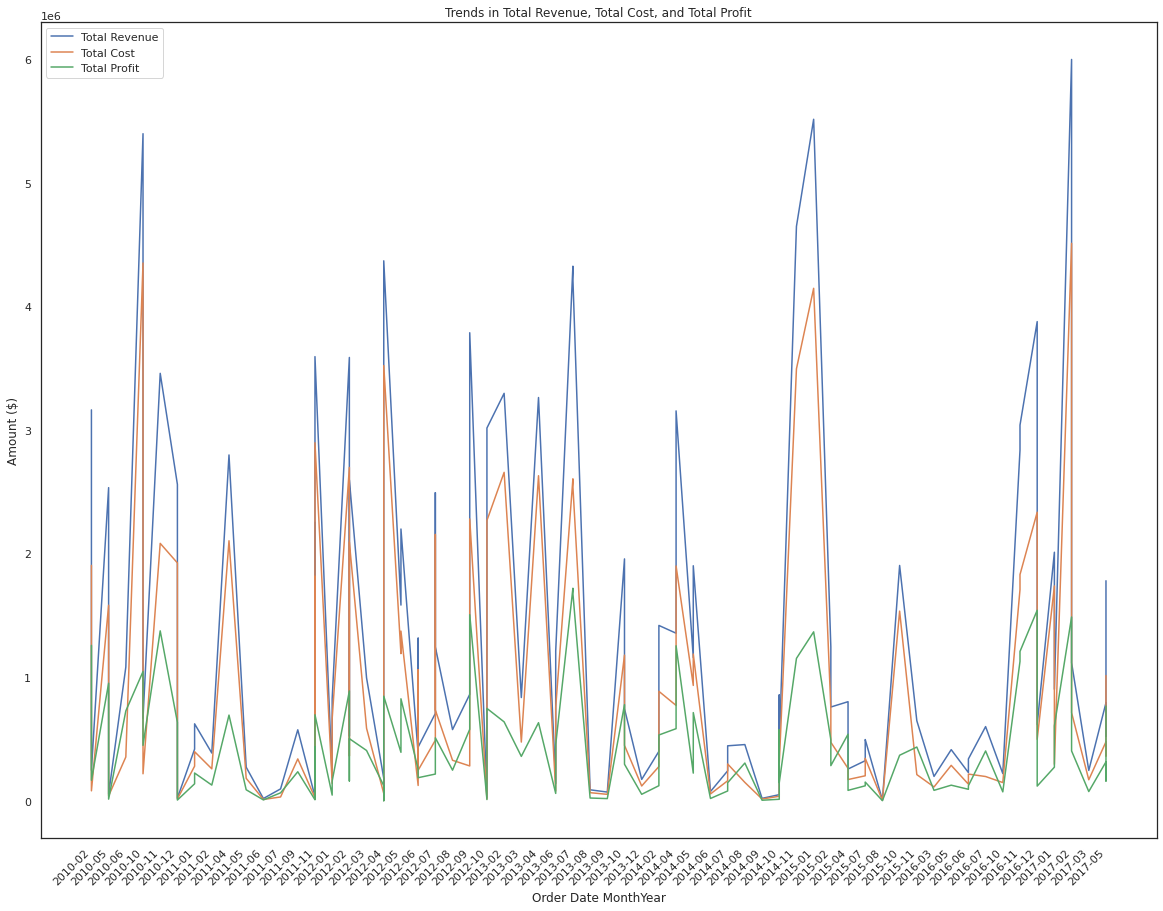

In [100]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Order Date MonthYear
df_sorted = df.sort_values('Order Date MonthYear')

# Create a line plot
plt.figure(figsize=(20, 15))
plt.plot(df_sorted['Order Date MonthYear'], df_sorted['Total Revenue'], label='Total Revenue')
plt.plot(df_sorted['Order Date MonthYear'], df_sorted['Total Cost'], label='Total Cost')
plt.plot(df_sorted['Order Date MonthYear'], df_sorted['Total Profit'], label='Total Profit')

# Set the axis labels and title
plt.title('Trends in Total Revenue, Total Cost, and Total Profit')
plt.xlabel('Order Date MonthYear')
plt.ylabel('Amount ($)')
plt.legend()

# Adjust the x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()